In [1]:
from pipeline import CustomPipeline

In [2]:
pipe = CustomPipeline("logreg")

In [3]:
pipe.preprocessing("../physionet.org/files/widsdatathon2020/1.0.0/data/training_v2.csv", "../physionet.org/files/widsdatathon2020/1.0.0/data/WiDS_Datathon_2020_Dictionary.csv", "hospital_death")

Binary atts : ['hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']
String atts : ['bmi', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_admit_type', 'icu_stay_type', 'icu_type', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_3j_bodysystem', 'apache_2_bodysystem']
Integer atts : ['encounter_id', 'hospital_id', 'patient_id', 'icu_id', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache']
Float atts : ['age', 'height', 'pre_icu_los_days', 'weight', 'albumin_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', '

/Users/alexraudvee/Desktop/TU_e/year_3/Y3_Q3_Responsible_Data_Science/Fairness-First-ICU-ML/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
pipe.train()

Training is Done


In [5]:
pipe.predict()


                Accuracy: 0.7403369132639154

                Confusion Matrix: 
[[12556  4234]
 [  529  1024]]

                Report: 
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     16790
           1       0.19      0.66      0.30      1553

    accuracy                           0.74     18343
   macro avg       0.58      0.70      0.57     18343
weighted avg       0.89      0.74      0.79     18343


                
ROC AUC: 0.768
F1 Score: 0.301
Average Precision (PR AUC): 0.248
Brier Score: 0.190 (lower = better calibrated)
Demographic Parity difference = -0.026
Privileged group selection rate = 0.275
Unprivileged group selection rate = 0.300
Equalized Odds TPR difference = -0.040
TPR (priv) = 0.640, TPR (unpriv) = 0.681
Equalized Odds FPR difference = -0.023
FPR (priv) = 0.242, FPR (unpriv) = 0.265


/Users/alexraudvee/Desktop/TU_e/year_3/Y3_Q3_Responsible_Data_Science/Fairness-First-ICU-ML/training/pipeline.py:237: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


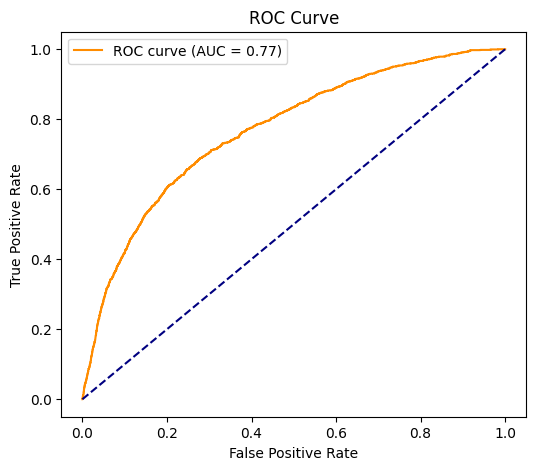

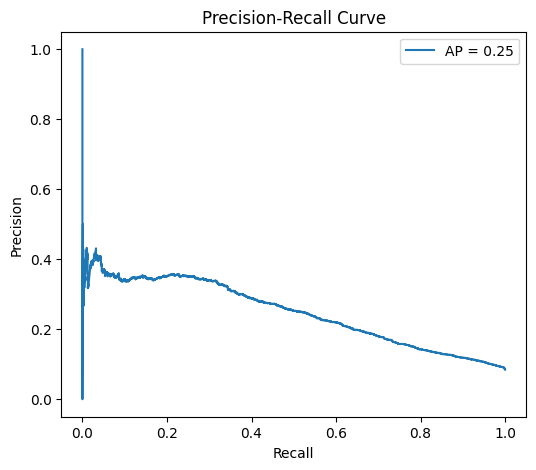

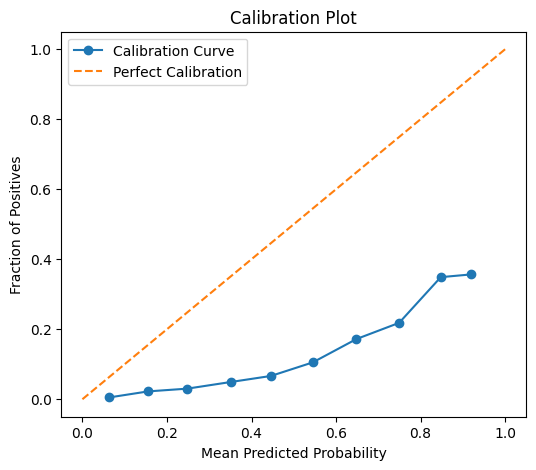

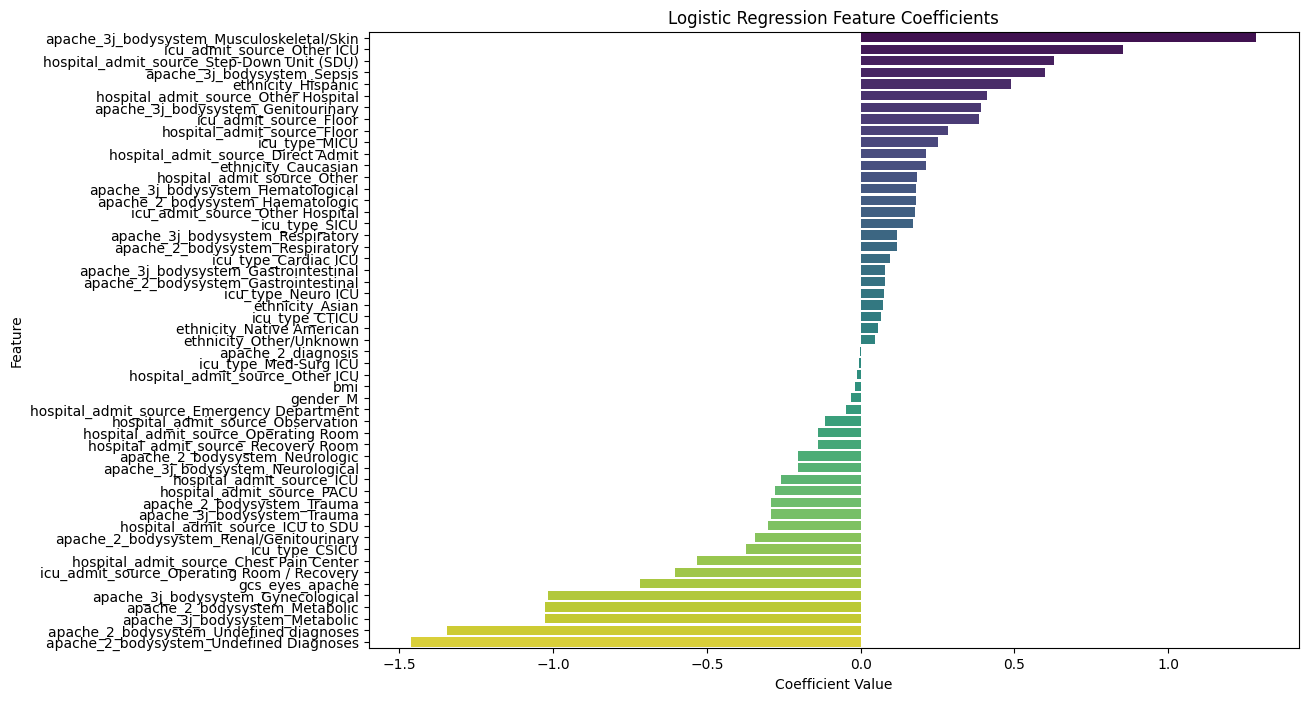

In [6]:
pipe.eval()